# Análisis de Sentimientos de Tweets con MongoDB

## Introducción

Bienvenidos a este cuaderno de Jupyter para el análisis de sentimientos de tweets almacenados en una base de datos MongoDB. Este cuaderno está diseñado para que los analistas de datos puedan explorar, consultar y analizar tendencias de tweets utilizando la librería `pymongo` para interactuar con MongoDB.

## Objetivo

El objetivo de este cuaderno es proporcionar una plataforma interactiva para que los analistas puedan:

1. **Conectarse a la base de datos MongoDB**: Acceder a los tweets almacenados, con sus correspondientes análisis de sentimiento.
2. **Realizar consultas y filtrados**: Buscar y filtrar tweets basados en varios criterios como fecha, usuario, contenido, y sentimiento (positivo, negativo, neutro).
3. **Visualizar tendencias**: Analizar las tendencias de los sentimientos a lo largo del tiempo o entre diferentes categorías de tweets.
4. **Generar informes y gráficos**: Crear visualizaciones y resúmenes estadísticos para presentar hallazgos importantes.

## 1. Conexión a la Base de Datos MongoDB

Utilizaremos `pymongo` para establecer esta conexión.



In [1]:
from pymongo import MongoClient

# Configuración de la conexión a MongoDB
client = MongoClient("mongodb://mongo:27017")

# Conectar con la base de datos `twitter_data`
db = client['twitter_data']
# Conectar con la colección `sentiment_tweets`
collection = db['sentiment_tweets']

print("Conexión establecida con éxito a la base de datos.")

Conexión establecida con éxito a la base de datos.


## 2. Exploración de Datos

En esta sección, exploraremos la estructura de los datos almacenados en la base de datos, visualizaremos algunos ejemplos de tweets y sus sentimientos.


In [2]:
# Obtener un ejemplo de documento
ejemplo_tweet = collection.find_one()
print(ejemplo_tweet)

{'_id': ObjectId('66675bd5407e0c6c51ffd53d'), 'date': 'Mon Apr 06 22:19:45 PDT 2009', 'sentiment_score': 0.7333614826202393, 'tweet_id': 1467810369, 'tweet': "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", 'sentiment_label': 'NEU', 'username': '_TheSpecialOne_'}


## 3. Consultas y Filtrados

Aprenderemos a realizar diversas consultas en MongoDB para filtrar tweets basados en criterios específicos. Por ejemplo, obtener todos los tweets con sentimiento positivo:

In [3]:
# Consulta para obtener tweets con sentimiento positivo
tweets_positivos = collection.find({'sentiment_label': 'POS'})
for tweet in tweets_positivos:
    print(tweet)

{'_id': ObjectId('66675bd5407e0c6c51ffd542'), 'date': 'Wed Jun 03 10:43:37 PDT 2009', 'sentiment_score': 0.9443325400352478, 'tweet_id': 2018926026, 'tweet': 'On the way home from SFA.. Taylor is cracking me up! ', 'sentiment_label': 'POS', 'username': 'woompi'}
{'_id': ObjectId('66675bd5407e0c6c51ffd544'), 'date': 'Wed Jun 03 10:43:38 PDT 2009', 'sentiment_score': 0.9924692511558533, 'tweet_id': 2018926205, 'tweet': "@samueltwitt1: I think it's safe to say that all of us are stoked and super excited. ", 'sentiment_label': 'POS', 'username': 'MissMON_ika'}
{'_id': ObjectId('66675bd5407e0c6c51ffd546'), 'date': 'Wed Jun 03 10:43:39 PDT 2009', 'sentiment_score': 0.5627674460411072, 'tweet_id': 2018926307, 'tweet': "@simalves LOL i was contemplating on doing the same thing Sim! but i really need to sleep... i'll stay for a few more minutes... ", 'sentiment_label': 'POS', 'username': 'Mia_R'}


## 4. Análisis de Tendencias

Realizaremos análisis más avanzados para identificar tendencias en los datos. Por ejemplo, veremos los porcentajes de sentimientos positivos, negativos y neutros.

In [4]:
import pandas as pd

# Obtener todos los documentos de la colección y cargarlos en un DataFrame de Pandas
df = pd.DataFrame(list(collection.find()))

# Calcular el conteo de cada sentimiento y el total de tweets
conteo_sentimientos = df['sentiment_label'].value_counts()
total_tweets = len(df)

# Calcular los porcentajes de sentimientos
porcentajes = (conteo_sentimientos / total_tweets) * 100

# Imprimir los resultados
print("Porcentajes de Sentimientos:")
print(porcentajes)

Porcentajes de Sentimientos:
sentiment_label
NEU    40.0
NEG    30.0
POS    30.0
Name: count, dtype: float64


## 5. Visualizaciones

Finalmente, utilizaremos bibliotecas como `matplotlib` para crear gráficos que representen nuestros hallazgos.

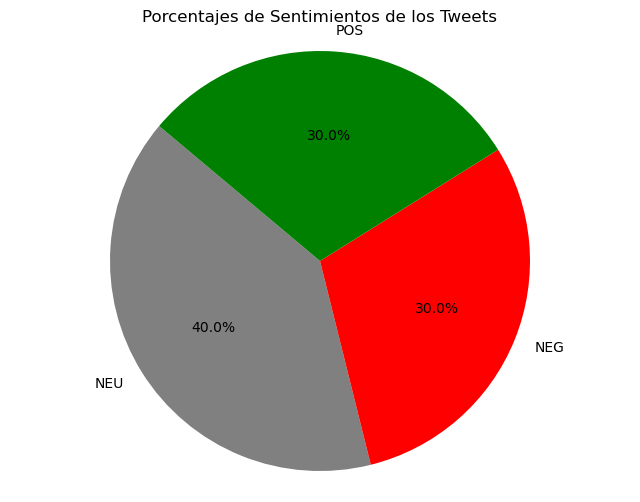

In [5]:
import matplotlib.pyplot as plt

# Visualizar los resultados en una gráfica de pastel
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=porcentajes.index, colors=['gray', 'red', 'green'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentajes de Sentimientos de los Tweets')
plt.show()